# Pre-treating data for analysis

In [1]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [2]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [3]:
#data imports 
filename = "../results/youtube_comments.csv"
youtube = pd.read_csv(filename)
youtube.head()


,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes
0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1
1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0
2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0
3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0
4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0


In [4]:
#deleting comments where users only identify each other (starting with @, ending with a space)
youtube['Comment'] = youtube['Comment'].fillna('').astype(str)

youtube = youtube[~youtube['Comment'].str.match(r'^@\w+\s*$')]
youtube.head()


,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes
0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1
1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0
2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0
3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0
4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0


In [5]:
videos_list = youtube['VideoID'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Video " + chr(ord('A')+i)
youtube['video_name'] = youtube['VideoID'].replace(renaming_posts)
#end exporting the correspondance to csv file between post and urls (for simplification of read)
renaming_table = pd.DataFrame(list(renaming_posts.items()), columns=['VideoID', 'video_name'])

# Save the table to a CSV file
renaming_table.to_csv('video_renaming_table.csv', index=False)

# Print the table to check
print(renaming_table)

       VideoID video_name
0  8zPor9l9SwI    Video A
1  1EuF7yfoyDE    Video B
2  YF7Hs4GeJkQ    Video C
3  EWUK5A-3LSI    Video D
4  Js4qqwdjA9M    Video E
5  y4BKfR5t1l8    Video F
6  w1u9IgepfAU    Video G
7  fxv-YhT3Ixc    Video H


In [14]:
comments_per_user = youtube.groupby(["Username"], as_index = False).agg(nb_interactions_on_all_videos = ("video_name", 'count')).sort_values(by="nb_interactions_on_all_videos")
count_post_user = youtube.groupby(["Username", "video_name"], as_index = False).agg(nb_interactions_on_post = ("video_name", 'count')).sort_values(by="nb_interactions_on_post")

In [15]:
comments_per_user

,Username,nb_interactions_on_all_videos
0,@-BumbleBerry-,1
6428,@joshuamontoya1146,1
6427,@joshualeclair9729,1
6425,@joshuaguzman7725,1
6424,@joshuafriesen4436,1
...,...,...
9244,@tasha1626,43
1072,@GOCAPSDMV,45
3977,@boss-ov7jd,51
2585,@SS-iv7wv,60


In [16]:
count_post_user

,Username,video_name,nb_interactions_on_post
0,@-BumbleBerry-,Video A,1
6527,@joshuamontoya1146,Video B,1
6528,@joshuaporterfield6774,Video A,1
6529,@joshuaschmidt323,Video B,1
6530,@joshuathompson9346,Video B,1
...,...,...,...
9393,@tasha1626,Video C,43
1085,@GOCAPSDMV,Video B,45
4039,@boss-ov7jd,Video A,51
2623,@SS-iv7wv,Video A,60


/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/51559023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_name', y='interaction_count', data=users_per_post, palette='viridis')


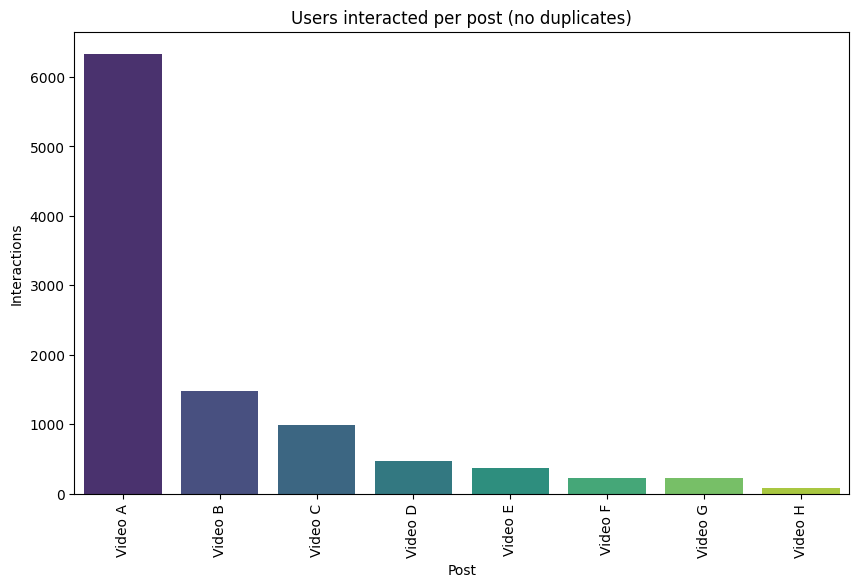

In [17]:
count_post_user.dropna()
users_per_post = count_post_user.groupby('video_name').size().reset_index()
users_per_post.rename( columns={0 :'interaction_count'}, inplace=True )


users_per_post = users_per_post.sort_values(by='interaction_count', ascending=False)



#barplotting 
plt.figure(figsize=(10, 6))
sns.barplot(x='video_name', y='interaction_count', data=users_per_post, palette='viridis')
plt.xticks(rotation=90)
plt.title("Users interacted per post (no duplicates)")
plt.xlabel("Post")
plt.ylabel("Interactions")
plt.show()

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/3818967329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_name', y='share_of_users', data=users_per_post, palette='viridis')


Text(0, 0.5, 'Share of users that interacted with the post')

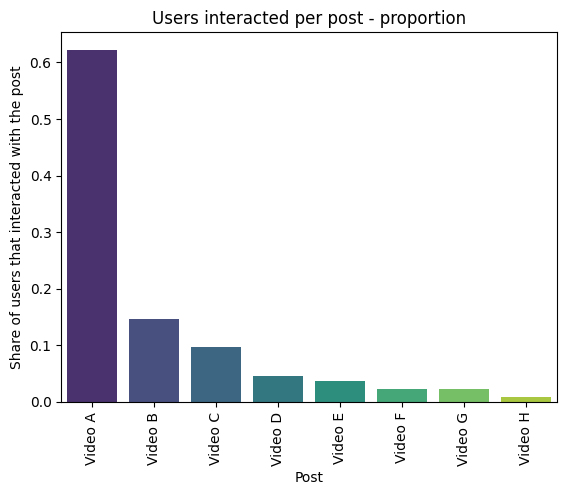

In [19]:

users_per_post['share_of_users'] = users_per_post['interaction_count']/sum(users_per_post['interaction_count'])
users_per_post
sns.barplot(x='video_name', y='share_of_users', data=users_per_post, palette='viridis')
plt.xticks(rotation=90)
plt.title("Users interacted per post - proportion")
plt.xlabel("Post")
plt.ylabel("Share of users that interacted with the post")



In [ ]:
#number of likes median par commentaire sur un post 



In [ ]:
# Proportion de commentaires avec les emojis (barchart? piechart?)



In [ ]:
# NB OF USERS 
# COMMENT LENGTH 
# NB DE LIKES EN MOYENNE PAR POST PAR COM 
 
# PROPORTION DES COMS AVEC DES EMOJIS 
# COMS SEULEMENT AVEC EMOJIS / EMOJIS ET IDENTIFICATIONS 
# FAIRE DES BINS AVEC NB DE LIKES ? 

#nb de commentaires qui contiennent brat 
#nb de commentaires content kamala 
#nb de coms contenant trump/republican 


In [20]:
# contains 
youtube['contains_brat'] = youtube['Comment'].str.contains('brat', case = False, regex=True)
youtube['contains_kamala'] = youtube['Comment'].str.contains('kamala', case = False, regex=True)
youtube['contains_trump'] = youtube['Comment'].str.contains('trump', case = False, regex=True)
youtube['contains_politics'] = youtube['Comment'].str.contains('politic', case = False, regex=True)
youtube['contains_democrat']= youtube['Comment'].str.contains('democrat', case = False, regex=True)
youtube['contains_republican'] = youtube['Comment'].str.contains('republican', case = False, regex=True)



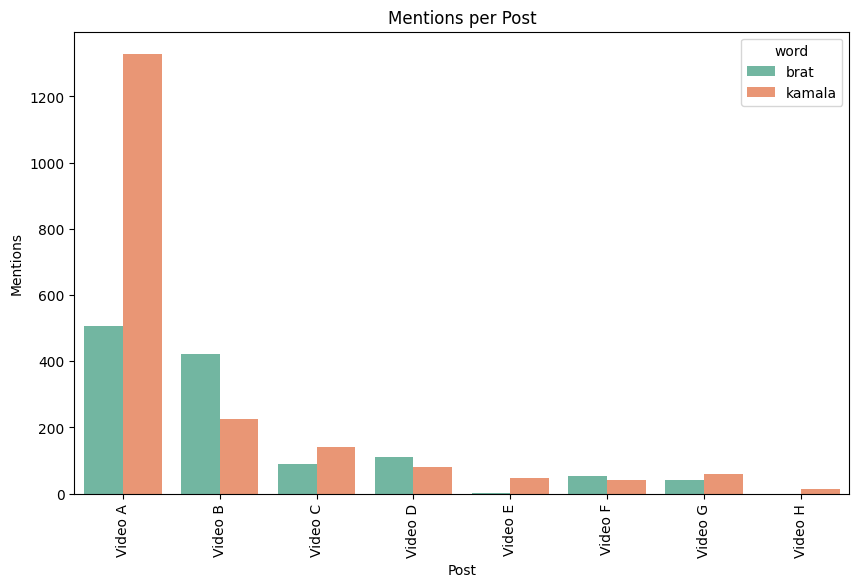

In [21]:

# Compter les mentions pour chaque mot par post
mentions = youtube.groupby('video_name')[['contains_brat', 'contains_kamala']].sum()

# Passer en colonnes pour un tracé simultané
mentions.reset_index(inplace=True)

# Visualisation avec sns.barplot
mentions_long = mentions.melt(id_vars='video_name', var_name='word', value_name='mentions')

# Renommer les mots pour plus de clarté
mentions_long['word'] = mentions_long['word'].str.replace('contains_', '')

# Tracé du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mentions_long,
    x='video_name',
    y='mentions',
    hue='word',
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title("Mentions per Post")
plt.xlabel("Post")
plt.ylabel("Mentions")
plt.show()


/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/3929713008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_likes_per_post, x='video_name', y='mean_likes', palette='Blues_d')


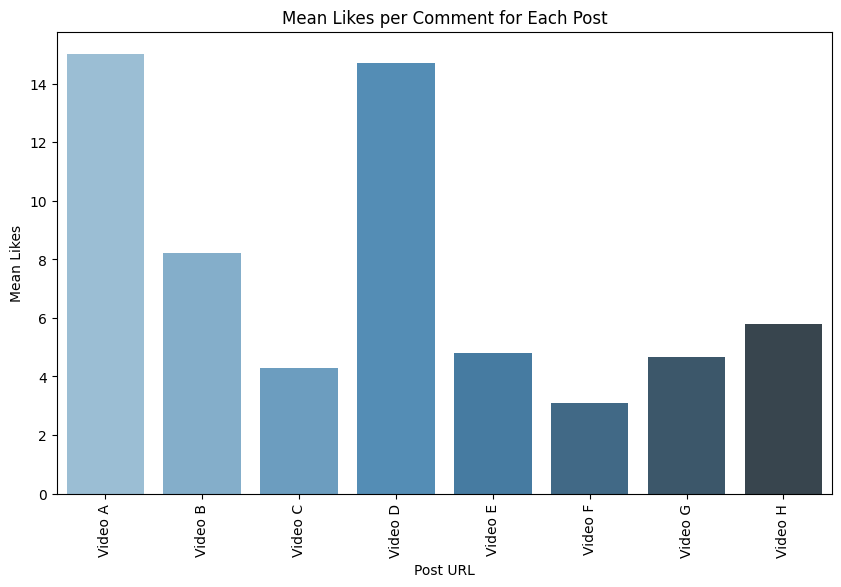

In [23]:
#mean comment likes per post 
mean_likes_per_post = youtube.groupby('video_name')['NbLikes'].mean().reset_index()
mean_likes_per_post.columns = ['video_name', 'mean_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_likes_per_post, x='video_name', y='mean_likes', palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Mean Likes per Comment for Each Post')
plt.xlabel('Post URL')
plt.ylabel('Mean Likes')
plt.show() #ptet compute ecart type ?

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/786295150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=max_likes_per_post, x='video_name', y='max_likes', palette='Reds_d')


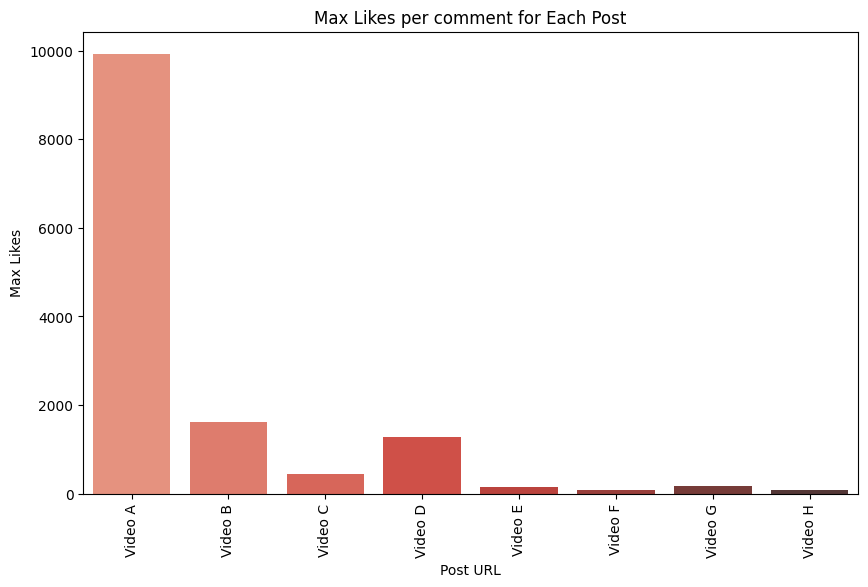

In [24]:
#Max likes per comment for each post : 

max_likes_per_post = youtube.groupby('video_name')['NbLikes'].max().reset_index()
max_likes_per_post.columns = ['video_name', 'max_likes']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=max_likes_per_post, x='video_name', y='max_likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Max Likes per comment for Each Post')
plt.xlabel('Post URL')
plt.ylabel('Max Likes')
plt.show()

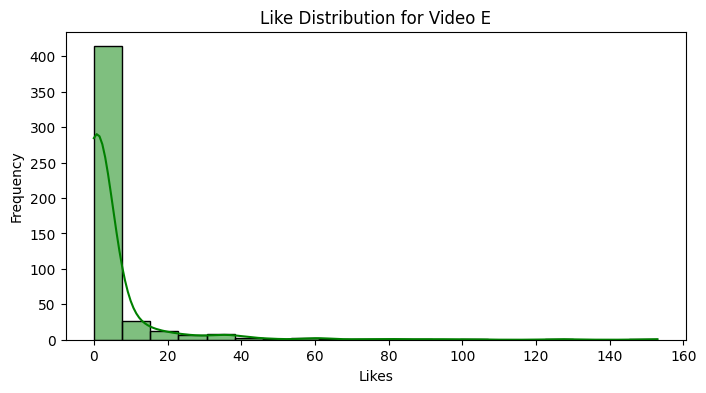

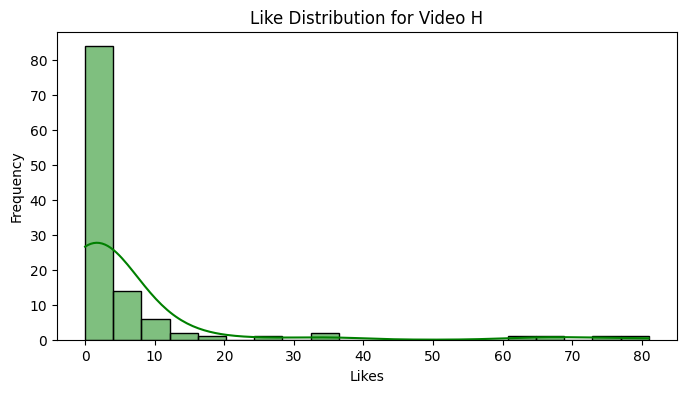

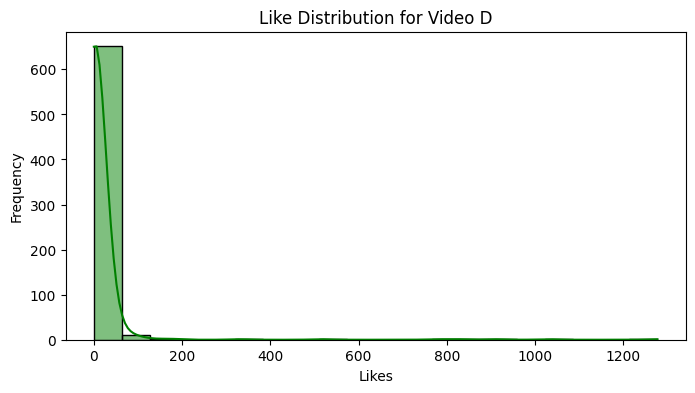

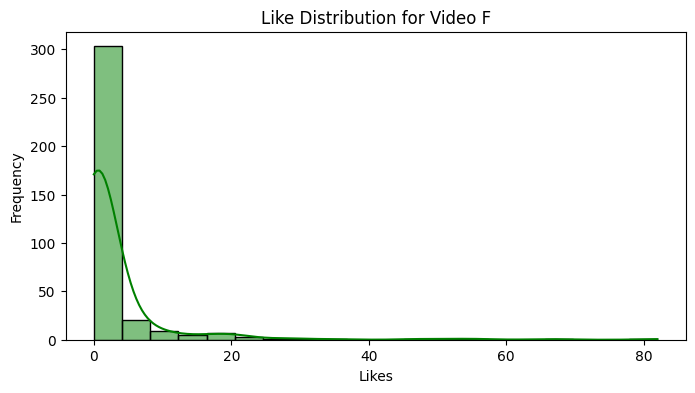

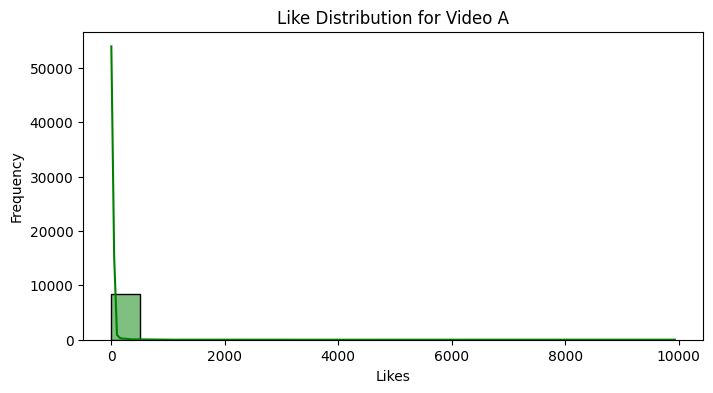

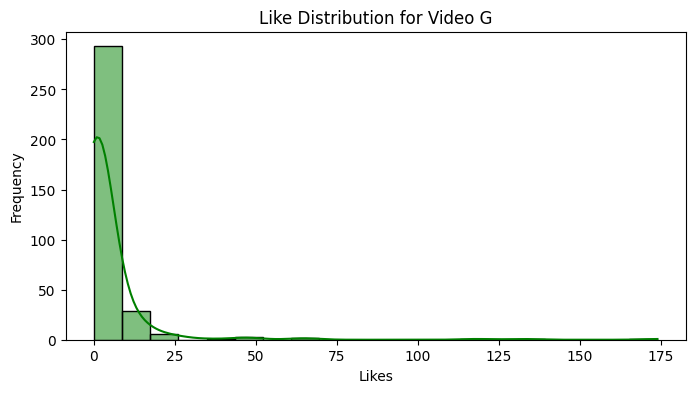

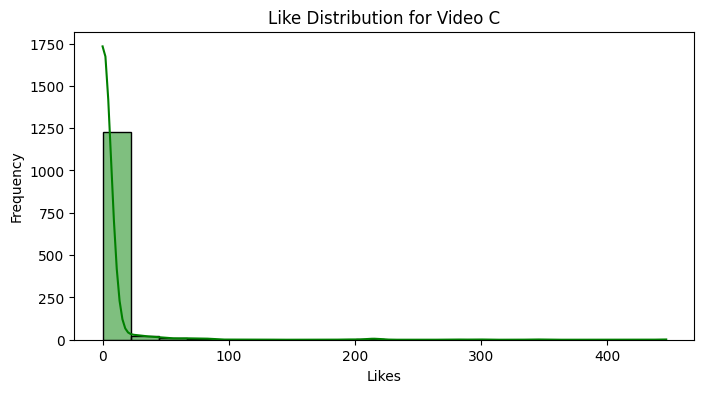

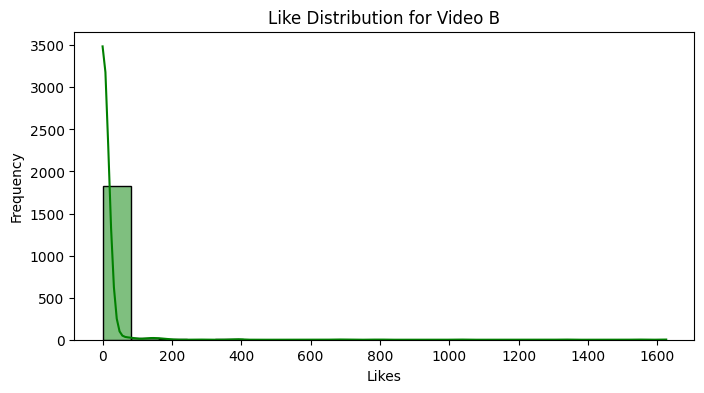

In [26]:
unique_posts = youtube['video_name'].unique()

for post in unique_posts:
    post_likes = youtube[youtube['video_name'] == post]['NbLikes']
    
    plt.figure(figsize=(8, 4))
    sns.histplot(post_likes, bins=20, kde=True, color='green')
    plt.title(f'Like Distribution for {post}')
    plt.xlabel('Likes')
    plt.ylabel('Frequency')
    plt.show()

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/4208680462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tot_likes_per_post, x='video_name', y='tot_likes', palette='Reds_d')


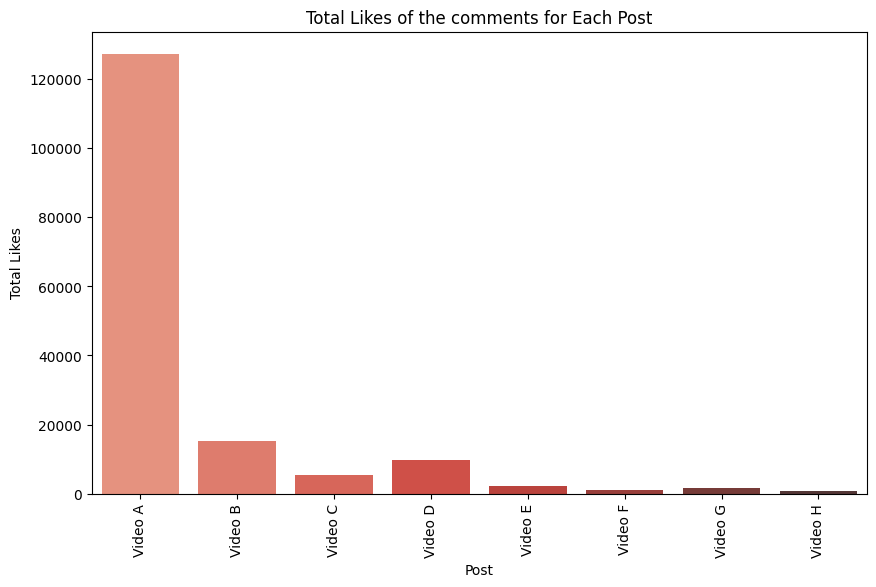

In [27]:
# Total likes in comments per post 
tot_likes_per_post = youtube.groupby('video_name')['NbLikes'].sum().reset_index()
tot_likes_per_post.columns = ['video_name', 'tot_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_likes_per_post, x='video_name', y='tot_likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Total Likes of the comments for Each Post')
plt.xlabel('Post')
plt.ylabel('Total Likes')
plt.show()

In [119]:
youtube.dtypes

Comment Number (ID)              int32
Nickname                        string
User @                          string
User URL                        object
Comment Text                    object
Time                    datetime64[ns]
Likes                            int32
Profile Picture URL             object
Is 2nd Level Comment            object
User Replied To                 object
Number of Replies                int32
post_url                        object
shown_comments                   int32
scraped_comments                 int32
difference                       int32
publisher                       object
post_likes                      object
post_shares                     object
post_description                object
date_scraped                    object
post_name                       object
ratio_scraped_shown            float64
contains_brat                     bool
contains_kamala                   bool
contains_trump                    bool
contains_politics        

In [ ]:
# Total likes OF the post 

likes_per_post = youtube.groupby('video_name')['post_likes']
likes_per_post.columns = ['video_name', 'likes']
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=likes_per_post, x='video_name', y='likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Likes of the post')
plt.xlabel('Post')
plt.ylabel('Number of Likes')
plt.show()

In [ ]:
#Number of comments per post 


# TF-IDF